In [1]:
import sys
sys.path.append('../')
from src.utilities.eval_utils import export_from_mlflow
from matplotlib import pyplot as plt
import matplotlib
from mlflow.tracking import MlflowClient
%matplotlib inline
font = {
    'size'   : 22
}
matplotlib.rc('font', **font)

import pandas as pd
import math
import numpy as np

In [2]:
mlflow_uri = '../mlruns'

metrics=[
    'mean_test_acc',
    'std_test_acc',
    'mean_test_acc_wo_val',
    'std_test_acc_wo_val',
    'mean_test_auc',
    'std_test_auc',
    'mean_test_auc_wo_val',
    'std_test_auc_wo_val'
]

style_mapper = {
    "RandomSampling": ["Random", ".", "--", "black"],
    "DegreeSampling": ["Degree", "s", "solid", "tab:pink"],
    "ImportanceSampling": ["Importance", "P", "solid", "tab:olive"],
    "EntropySampling": ["Entropy", "o", "solid", "tab:purple"],
    "FeatProp": ["FeatProp", "*", "solid", "tab:red"],
    "AGE": ["AGE", "|", "solid", "tab:green"],
    "LSCALE": ["LSCALE", "p", "solid", "tab:orange"],
    "DiffusAL": ["DiffusAL", "^", "solid", "tab:blue"],
    "GRAIN": ["GRAIN", "x", "solid", "tab:brown"],
    "Coreset": ["Coreset", "d", "solid", "tab:grey"],
}


In [3]:
exps = [
    "DiffusAL_Cora",
    "DiffusAL_Citeseer", 
    "DiffusAL_Pubmed", 
    "DiffusAL_Physics",
    "DiffusAL_CS",
]

eval_metric = "mean_test_acc"
eval_std = "std_test_acc"

_display_strategies = [
    "DiffusAL",
    "GRAIN",
    "LSCALE",
    "AGE",
    "FeatProp",
    "Coreset",
    "EntropySampling", 
    "RandomSampling", 
    "DegreeSampling",  
]

all_runs_df = pd.concat([export_from_mlflow(mlflow_uri=mlflow_uri,
                                mlflow_experiment_name=exp_name,
                                metrics=metrics,
                               ) for exp_name in exps])
all_runs_df

In [5]:
filtered_runs_df = all_runs_df[all_runs_df.baseline.isin(_display_strategies)]
filtered_runs_df

,baseline,dataset,exp_name,init_size,labeled,mean_test_acc,mean_test_acc_wo_val,mean_test_auc,mean_test_auc_wo_val,model_params.dropout,...,model_params.num_classes,model_params.weight_decay,qs,rounds,std_test_acc,std_test_acc_wo_val,std_test_auc,std_test_auc_wo_val,strategy_params.clf,strategy_params.dataset_name
9b1ffd28187d4172b7c28de4cab10ca3,DiffusALFinal3,Cora,DiffusAL_Cora,14,140,0.8364,0.8350,0.965359,0.964318,0.5,...,7,0.0001,14,10,0.012460,0.011841,0.005086,0.005110,qbc,Cora
6eb1869f658f4c47b04cbfb79bacb601,Coreset,Cora,DiffusAL_Cora,14,140,0.8010,0.7986,0.957113,0.956344,0.5,...,7,0.0001,14,10,0.024096,0.024602,0.007408,0.008154,gcn,Cora
86ea924babaa4fef8eb21a6b290cd85e,LSCALE,Cora,DiffusAL_Cora,14,140,0.7942,0.7881,0.961608,0.959642,0.5,...,7,0.0001,14,10,0.020203,0.022858,0.003681,0.003987,distance_based,Cora
80dcb720b7a5435c9c75d4c473d5cc45,DegreeSampling,Cora,DiffusAL_Cora,14,140,0.8166,0.8119,0.964881,0.964654,0.5,...,7,0.0001,14,10,0.014129,0.017067,0.005430,0.004300,gcn,Cora
e9ce3df7859845848a3a25e43a16713c,GRAIN,Cora,DiffusAL_Cora,14,140,0.8094,0.8085,0.961524,0.960863,0.5,...,7,0.0001,14,10,0.015698,0.007487,0.005572,0.005147,gcn,Cora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311429cf3f5849d6bb51388b99cd9cfa,RandomSampling,CS,DiffusAL_CS,30,300,0.8630,0.8359,0.989315,0.987632,0.5,...,15,0.0001,30,10,0.012025,0.012020,0.003814,0.003786,linear,CS
a45ed9ff167041c496ec7b90776c7606,FeatProp,CS,DiffusAL_CS,30,300,0.9022,0.8975,0.990244,0.989604,0.5,...,15,0.0001,30,10,0.014330,0.015468,0.003603,0.003902,mlp,CS
5a0262bd2ec5409a802d7dd23cea0caa,AGE,CS,DiffusAL_CS,30,300,0.9029,0.9011,0.987108,0.988780,0.5,...,15,0.0001,30,10,0.004657,0.008288,0.003436,0.003221,mlp,CS
fd2df969b0f24c5da20d222e435e20a0,EntropySampling,CS,DiffusAL_CS,30,300,0.9053,0.9055,0.992322,0.992672,0.5,...,15,0.0001,30,10,0.020318,0.025212,0.003862,0.004197,mlp,CS


In [7]:
from scipy import stats

matrix = np.zeros((len(_display_strategies), len(_display_strategies)))
tracking = MlflowClient()
metric_name = "test_acc"
seeds = [1,2,3,4,5,6,7,8,9,10]

for i, method_i in enumerate(_display_strategies):
    print(f"***** Processing {method_i}")
    for j, method_j in enumerate(_display_strategies):
        if method_i == method_j:
            continue
        print(f"\t ***** Competing {method_j}")
        # temp_win_i = 0
        # temp_errors = 0
        n_competitions = 0
        for dataset in ["Pubmed","Cora", "Citeseer", "CS", "Physics"]:
            row_i = filtered_runs_df[(filtered_runs_df["baseline"] == method_i) & (filtered_runs_df["dataset"] == dataset)]
            row_j = filtered_runs_df[(filtered_runs_df["baseline"] == method_j) & (filtered_runs_df["dataset"] == dataset)]
                        
            try:
                # shape (n_seed, n_budgets)
                results_i_all = np.asarray([[m.value for m in tracking.get_metric_history(row_i.index[0], f"{metric_name}_{seed}")] for seed in seeds])
                results_j_all = np.asarray([[m.value for m in tracking.get_metric_history(row_j.index[0], f"{metric_name}_{seed}")] for seed in seeds])
                
                results_i = [m.value for m in tracking.get_metric_history(row_i.index[0], f"mean_{metric_name}")]
                results_j = [m.value for m in tracking.get_metric_history(row_j.index[0], f"mean_{metric_name}")]
                
                for b in np.arange(results_i_all.shape[-1]):                   
                    errors_i = 1-results_i_all[:,b]
                    errors_j = 1-results_j_all[:,b]
                    # print(f"Errors i {method_i}: \t\t {errors_i}")
                    # print(f"Errors j {method_j}: \t\t {errors_j}")
                    N = len(errors_i)
                    Z = errors_i - errors_j
                    mu = np.mean(Z)
                    var = 1. / (N - 1) * np.sum((Z - mu) ** 2)                   
                    # t, pval = stats.ttest_ind(exp1[:N], exp2[:N])
                    # z, pval = wstats.ztest(Z / var)
                    t, pval = stats.ttest_1samp(Z, 0.0)
                    n_competitions += 1
                                        
                    if mu < 0 and pval < 0.05:
                        print(f"\t\t\t {method_i} beating {method_j} ({dataset}) | Z: {Z} | mu: {mu}")
                        matrix[i,j] += 1./5
                        # temp_win_i += 1./5  # 5 datasets                    

            except error as e:
                print(e)
                continue
        print(f"\t\t ---> {method_i} and {method_j} competed {n_competitions} times.")


***** Processing DiffusALFinal3
	 ***** Competing GRAIN
			 DiffusALFinal3 beating GRAIN (Pubmed) | Z: [-0.023  0.007 -0.046 -0.025 -0.048 -0.028 -0.047 -0.03   0.036 -0.024] | mu: -0.022799999999999997
			 DiffusALFinal3 beating GRAIN (Pubmed) | Z: [-0.072 -0.017  0.003 -0.021 -0.053 -0.026 -0.026 -0.012  0.011 -0.01 ] | mu: -0.022299999999999986
			 DiffusALFinal3 beating GRAIN (Pubmed) | Z: [-0.027 -0.031 -0.01  -0.018 -0.022 -0.009  0.001  0.004  0.009 -0.028] | mu: -0.013099999999999978
			 DiffusALFinal3 beating GRAIN (Pubmed) | Z: [-0.054 -0.007 -0.026 -0.009 -0.042 -0.025 -0.019 -0.007 -0.011 -0.035] | mu: -0.023499999999999976
			 DiffusALFinal3 beating GRAIN (Pubmed) | Z: [-0.057 -0.009 -0.029 -0.019 -0.051 -0.049 -0.012 -0.033 -0.008 -0.026] | mu: -0.029299999999999972
			 DiffusALFinal3 beating GRAIN (Pubmed) | Z: [-0.07  -0.003 -0.052 -0.031 -0.054 -0.049 -0.034 -0.019 -0.028 -0.036] | mu: -0.03759999999999997
			 DiffusALFinal3 beating GRAIN (Pubmed) | Z: [-0.056 -0.016 -

# Heatmap with Seaborn

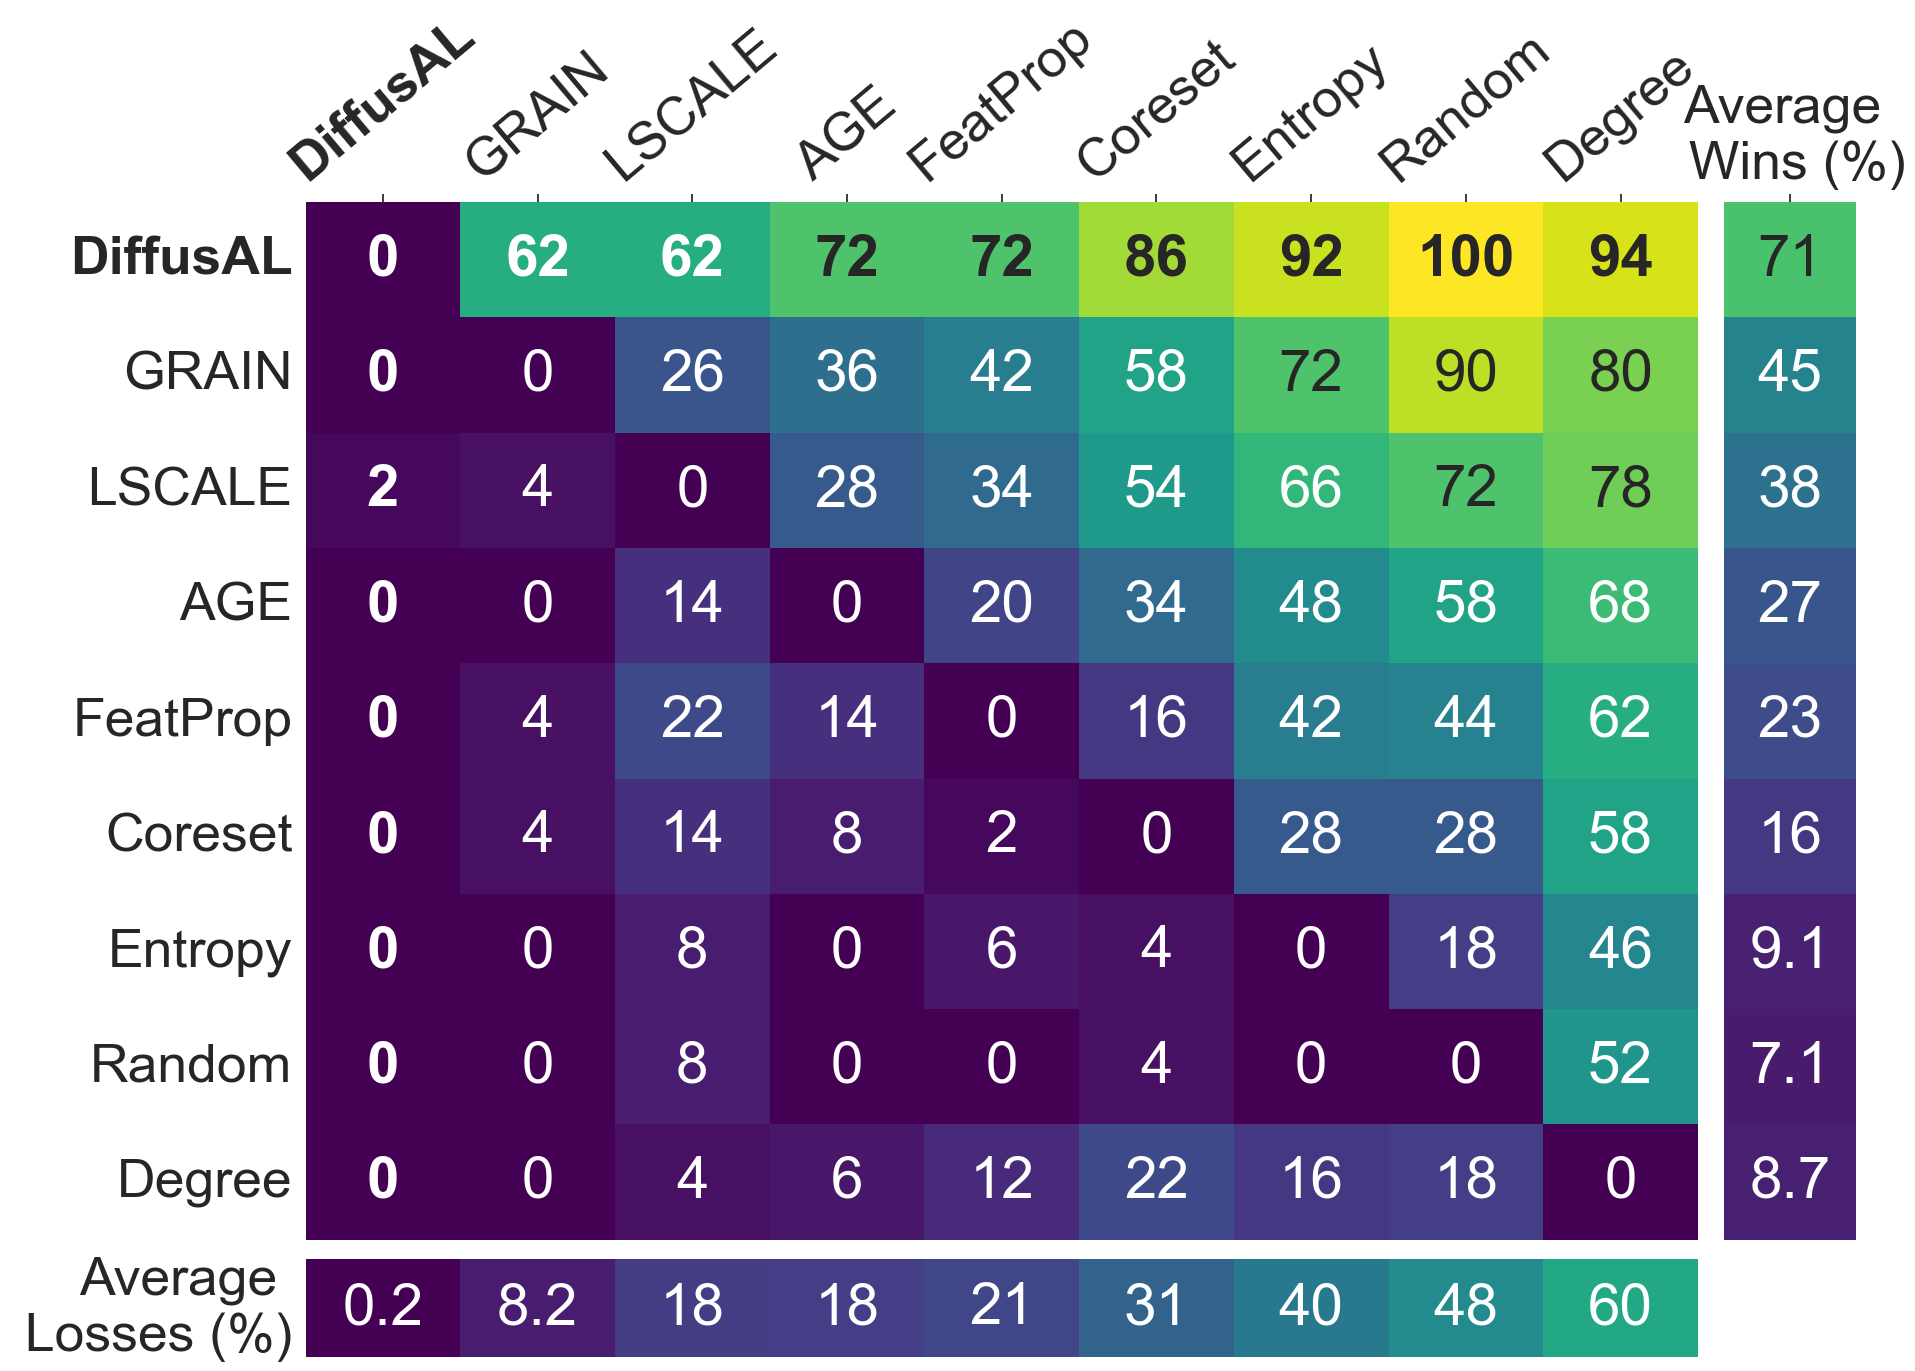

In [14]:
import seaborn as sns

matPlot = matrix
col_avg = matPlot.mean(axis=0)
row_avg = matPlot.mean(axis=-1)

matPlot = np.round(matPlot * 100) / 10

col_avg = np.round(col_avg * 100) / 10
row_avg = np.round(row_avg * 100) / 10
min_e = matPlot.min()
max_e = matPlot.max()

sns.set(font_scale=3.5)


n_comp = 9
n_all = n_comp + 1
fig = plt.figure(figsize=(20,15))
ax1 = plt.subplot2grid((n_all,n_all), (0,0), colspan=n_comp, rowspan=n_comp)
ax2 = plt.subplot2grid((n_all,n_all), (n_comp,0), colspan=n_comp, rowspan=1)
ax3 = plt.subplot2grid((n_all,n_all), (0,n_comp), colspan=1, rowspan=n_comp)

mask = np.zeros_like(matPlot)
# mask[np.tril_indices_from(mask)] = True

sns.heatmap(matPlot, ax=ax1, annot=True, cmap="viridis", linecolor='b', cbar = False, fmt='g')
ax1.xaxis.tick_top()
ax1.set_xticklabels([style_mapper[alg][0] for alg in _display_strategies],rotation=40)
ax1.set_yticklabels([style_mapper[alg][0] for alg in _display_strategies],rotation=0)

sns.heatmap(col_avg.reshape(1,-1), ax=ax2,  annot=True, cmap="viridis", vmin=min_e, vmax=max_e, cbar=False, xticklabels=False)
ax2.set_yticklabels(["Average \n Losses (%)"],rotation=0)

sns.heatmap(row_avg.reshape(-1,1), ax=ax3,  annot=True, cmap="viridis", vmin=min_e, vmax=max_e, cbar=False, yticklabels=False)
ax3.xaxis.tick_top()
ax3.set_xticklabels(["Average \n Wins (%)"])

for text in ax3.texts:
    if text.get_text() == '66': # lets highlight row 2        
        # set the properties of the heatmap annot
        # text.set_linecolor("purple")
        text.set_weight('bold')
        # text.set_color('purple')
        # text.set_size(25)
        
for text in ax2.texts:
    if text.get_text() == '0.4': # lets highlight row 2        
        # set the properties of the heatmap annot
        # text.set_linecolor("purple")
        text.set_weight('bold')
        # text.set_color('purple')
        # text.set_size(25)
        
for text in ax1.get_yticklabels():
    if text.get_text() == 'DiffusAL': # lets highlight row 2      
        # set the properties of the heatmap annot
        text.set_weight('bold')
        # text.set_color('purple')
        # text.set_size(25)
        
for text in ax1.get_xticklabels():
    if text.get_text() == 'DiffusAL': # lets highlight row 2      
        # set the properties of the heatmap annot
        text.set_weight('bold')
        # text.set_color('purple')
        # text.set_size(25)

for text in ax1.texts:
    if text._x == 0.5 or text._y == 0.5:
        text.set_weight('bold')
    # print(text._x)
    # print(text._y)
    # print(text.get_text())
    
plt.savefig("img" + '/' + 'comp_matrix' + '_' + "all" + '.pdf', bbox_inches="tight")